In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.svm import SVR
from seaborn import histplot
from statistics import mean, stdev
from random import sample

In [2]:
tickerData = yf.Ticker("AAPL")
hist = tickerData.history(interval="1d", start="2010-01-01")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.497554,6.530129,6.465589,6.515212,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.533175,6.563314,6.492076,6.526477,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.526477,6.552355,6.415967,6.422665,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.446410,6.454021,6.364212,6.410790,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.402268,6.454022,6.364518,6.453413,447610800,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,132.029999,134.919998,131.660004,134.759995,57758000,0.0,0.0
2023-01-17 00:00:00-05:00,134.830002,137.289993,134.130005,135.940002,63646600,0.0,0.0
2023-01-18 00:00:00-05:00,136.820007,138.610001,135.029999,135.210007,69672800,0.0,0.0


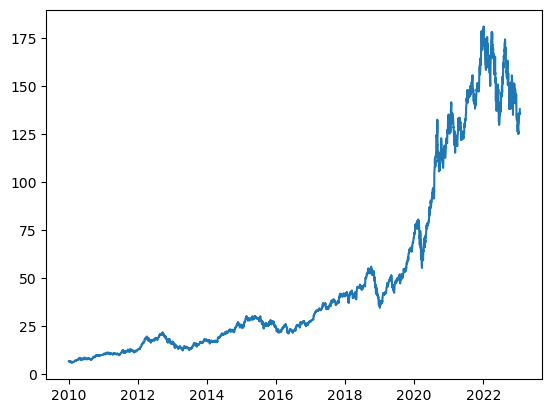

In [3]:
dates = hist.index.values
price = hist['Close'].values
plt.plot(dates,price)
plt.show()

In [4]:
list_variations = []
for i in range(5,len(dates)):
    row_variation = []
    for j in range(5,-1,-1):
        row_variation.append(price[i-j])
    list_variations.append(row_variation)
data = pd.DataFrame(list_variations, columns=["Day 5", "Day 4", "Day 3", "Day 2", "Day 1", "Day"])
data

,Day 5,Day 4,Day 3,Day 2,Day 1,Day
0,6.515212,6.526477,6.422665,6.410790,6.453413,6.396483
1,6.526477,6.422665,6.410790,6.453413,6.396483,6.323723
2,6.422665,6.410790,6.453413,6.396483,6.323723,6.412921
3,6.410790,6.453413,6.396483,6.323723,6.412921,6.375782
4,6.453413,6.396483,6.323723,6.412921,6.375782,6.269228
...,...,...,...,...,...,...
3275,129.619995,130.149994,130.729996,133.490005,133.410004,134.759995
3276,130.149994,130.729996,133.490005,133.410004,134.759995,135.940002
3277,130.729996,133.490005,133.410004,134.759995,135.940002,135.210007
3278,133.490005,133.410004,134.759995,135.940002,135.210007,135.270004


In [8]:
X = data[["Day 5", "Day 4", "Day 3", "Day 2", "Day 1"]].values
y = data["Day"].values
X_train, X_IVS, y_train, y_IVS = train_test_split(X, y, test_size=0.20, random_state=42)
rmse = []
rve = []
for i in range(200):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
    model = RandomForestRegressor(n_jobs=-1)
    model.fit(Xtrain,ytrain)
    preds = model.predict(Xtest)
    rmse.append(mean_squared_error(ytest, preds, squared = False))
    rve.append(explained_variance_score(ytest,preds))


rmse: 1.5320416431918635 +- 0.01304236629223995


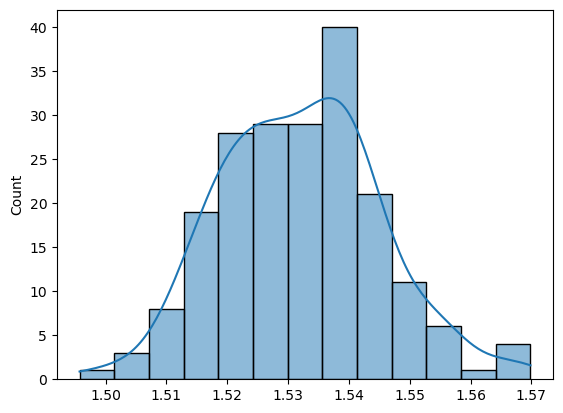

In [9]:
histplot(data=rmse, kde=True)
print("rmse:", mean(rmse),"+-", stdev(rmse))

RVE: 0.9990156333783228 +- 1.6779811969651187e-05


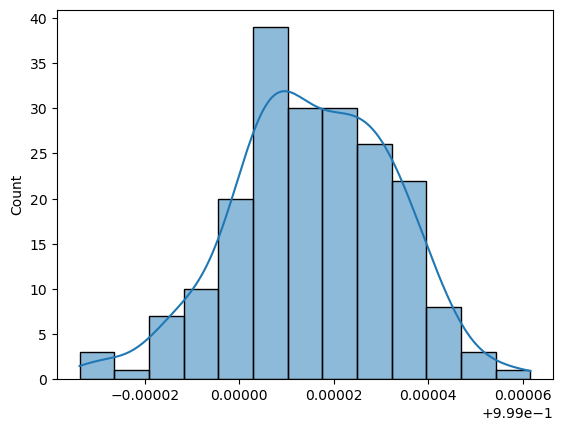

In [11]:
histplot(data=rve, kde=True)
print("RVE:", mean(rve),"+-", stdev(rve))

In [12]:
index = sample(range(len(X)),10)
X_predict = []
y_truth = []
for i in index:
    X_predict.append(X[i])
    y_truth.append(y[i])
X = np.delete(X, index,axis=0)
y = np.delete(y, index)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X,y)
preds = model.predict(X_predict)
for i in range(len(preds)):
    print("Previsão:", preds[i])
    print("Valor real:", y_truth[i])
    print("Erro relativo:", (abs(preds[i] - y_truth[i])/y_truth[i])*100,"%")

Previsão: 147.43328643798827
Valor real: 149.20248413085938
Erro relativo: 1.185769595712235 %
Previsão: 94.92874031066894
Valor real: 95.5687255859375
Erro relativo: 0.66965973580245 %
Previsão: 36.33630664825439
Valor real: 36.142333984375
Erro relativo: 0.5366910282087781 %
Previsão: 21.397656536102296
Valor real: 21.258811950683594
Erro relativo: 0.6531154503873295 %
Previsão: 25.789200859069823
Valor real: 25.724184036254883
Erro relativo: 0.25274590915423 %
Previsão: 14.479827136993409
Valor real: 14.673484802246094
Erro relativo: 1.3197796424135146 %
Previsão: 18.471198291778563
Valor real: 18.342208862304688
Erro relativo: 0.7032382546846017 %
Previsão: 11.889835214614868
Valor real: 11.845260620117188
Erro relativo: 0.37630741886740626 %
Previsão: 135.2140478515625
Valor real: 134.93841552734375
Erro relativo: 0.20426527400782615 %
Previsão: 155.27429443359375
Valor real: 162.9030303955078
Erro relativo: 4.682992049560073 %


In [11]:
def get_data(period,stock,start,n_days):
    tickerData = yf.Ticker(stock)
    hist = tickerData.history(interval=period, start=start)
    dates = hist.index.values
    price = hist['Close'].values
    list_variations = []
    for i in range(n_days,len(dates)):
        row_variation = []
        for j in range(n_days,-1,-1):
            row_variation.append(price[i-j])
        list_variations.append(row_variation)
    columns = ["Day " + str(i) for i in range(n_days,0,-1)] + ["Day"]
    data = pd.DataFrame(list_variations, columns=columns)
    return data

In [12]:
def generate_prevision(period,stock,start,n_days):
    data = get_data(period,stock,start,n_days)
    labels = ["Day " + str(i) for i in range(n_days,0,-1)]
    X = data[labels].values[:-1]
    y = data["Day"].values[:-1]
    X_predict = data[labels].values[-1].reshape(1,-1)
    preds = []
    for i in range(100):
        model = RandomForestRegressor(n_jobs=-1)
        model.fit(X,y)
        preds.append(model.predict(X_predict)[0])
    return mean(preds)

print("Previsão:", generate_prevision("1d","AAPL","2006-01-01",10))

Previsão: 134.8902639099121


In [6]:
def validate_model(period,stock,start, m, n_days):
    data = get_data(period,stock,start,n_days)
    labels = ["Day " + str(i) for i in range(n_days,0,-1)]
    X = data[labels]
    y = data["Day"].values
    X_train, X_IVS, y_train, y_IVS = train_test_split(X, y, test_size=0.20, random_state=42)
    rmse = []
    rve = []
    for i in range(200):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
        model = SVR(kernel="linear")
        model.fit(Xtrain,ytrain)
        preds = model.predict(Xtest)
        rmse.append(mean_squared_error(ytest, preds, squared = False))
        rve.append(explained_variance_score(ytest,preds))
    print("rmse:", mean(rmse),"+-", stdev(rmse))
    print("RVE:", mean(rve),"+-", stdev(rve))
    return rmse, rve